# Solving ODEs using python, some practical examples.

Differential equations (DES) are present in almost every physics phenomena. Sometimes, thise DEs can be solved analytically, and the variables of interest could be computed using a formula. However, most of the time, the DE cannot be solved analytically and requires numerical solutions.

In this notebook, we solve some examples of ordinary differential equations (ODEs), that is, differential equations with one independent variable. We may use the ---- numerical method and compare with the analytical expression whenever there is one.

This notebook is based on the classes of "Introduction to scientific programming with LINUX".

## Libraries.

In [149]:
from scipy.integrate import ode #This is what will be used to integrate the ODES
import matplotlib.pylab as plt
import scienceplots
import numpy as np

# Makes plots look better
plt.style.use(['science', 'notebook'])

## First example: 2D Kinematics
Let's start with an example in kinematics, just a simple projectile example.
The equations of motion are given by:


The y coordinate is given by:
$$ \frac{d^2y}{dt^2} = -g $$
The x coordinate:
$$ \frac{d^2x}{dt^2} = 0 $$

This system can be written as follows:
$$ \frac{d}{dt}Y = \begin{align}
    \frac{d}{dt} \begin{pmatrix}
           x \\
           \dot{x} \\
           y \\
           \dot{y} \\
         \end{pmatrix} = \begin{pmatrix}
           \dot{x} \\
           0\\
           \dot{y} \\
           -g\\
         \end{pmatrix}
  \end{align} = F(t, Y)$$
  
  To solve it, $\frac{dY}{dt} = F(t)$ needs to be integrated, this way we would have:
  
  $$Y = \int_{t_0}^t\frac{dY}{dt}dt = \int_{t_0}^t F(t, Y)dt$$
  
 Let's start by defining the $F(t, Y)$:

In [150]:
def vec_F(t,Y): #The same vector of the cell above
    F = [0,0,0,0] # F is a 4d vector
    F[0] = Y[1]
    F[1] = 0
    F[2] = Y[3]
    F[3] = -9.8 #m/s 
    return F

Now it's time to define the initial conditions:

In [151]:
x_0 = 0 # m
vx0 = 15 # m/s
y_0 = 5 # m
vy0 = 3 # m/s

vec_Y_0 = [x_0,vx0,y_0,vy0]
t_0 = 0

t = []
vec_Y = []

Solving the ODE using scipy.integrate:

In [152]:
#Build the solver

Sol = ode(vec_F).set_integrator('dopri5') # This is the solver, it uses a RK method. 
Sol.set_initial_value(vec_Y_0,t_0) # Initial conditions


t_final=1000  # s, T he maximum amount of time I'm willing to integrate
dt_0=5E-3 # s, The time step

while Sol.successful() and Sol.t<t_final and Sol.y[2] >= 0: # When the solutions is stopped
    Sol.integrate(Sol.t+dt_0)
    t.append(Sol.t)
    vec_Y.append(Sol.y)
    
vec_Y = np.array(vec_Y)

### Trajectory

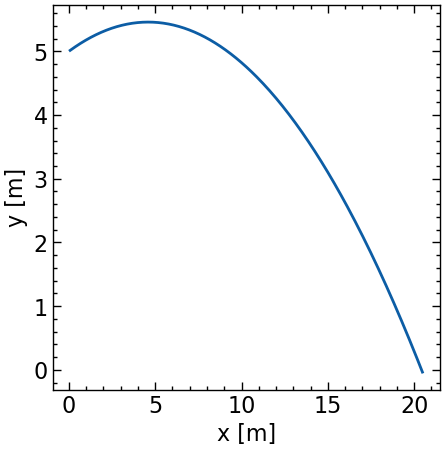

In [153]:
x = vec_Y[:,0]
y = vec_Y[:,2]
plt.figure(figsize =(5,5))
plt.plot(x, y)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

That is the expected trayectory...
## What about adding some wind?

Since the first example was very simple, it would be interesting to add some forces due to the wind. Let's suppose we have some wind that depends on altitude in the following manner
$$F_w = B\cdot\sqrt{y}\hat{x}+C\vec{y} = \begin{pmatrix}
B\sqrt{y} \\
Cy
\end{pmatrix}$$

This force produced by the wind can be visualized as the next figure shows:

In [154]:
x = np.linspace(-200,200, 100)
y = np.linspace(0,100, 200)
x_v, y_v = np.meshgrid(x,y)

ct_B = -2
ct_C = 0.1

xv, yv = np.meshgrid(x,y)

Fw_x = ct_B*np.sqrt(y_v)
Fw_y = ct_C*y_v
Fw_tot = Fw_x**2+Fw_y**2

Fw_norm = Fw_tot/Fw_tot.max()

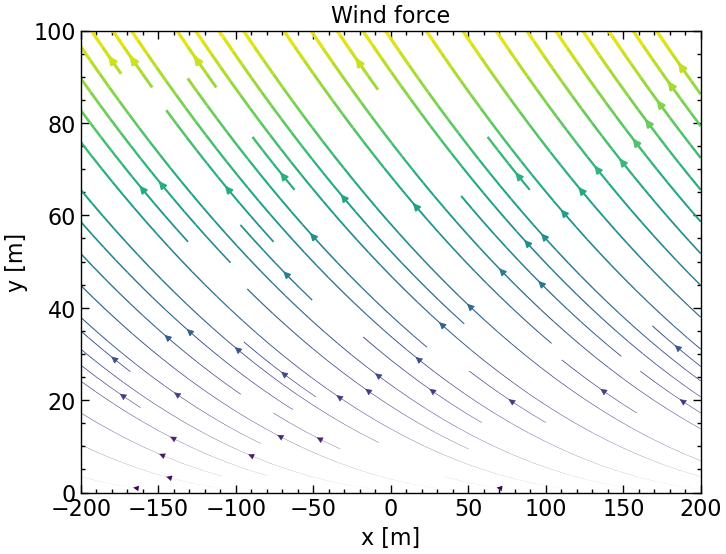

In [155]:
plt.streamplot(x,y, Fw_x, Fw_y, linewidth=2.5*Fw_norm, color = Fw_norm)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Wind force')
plt.show()

With this, the equations of motion would be:


$$ \frac{d}{dt}Y = \begin{align}
    \frac{d}{dt} \begin{pmatrix}
           x \\
           \dot{x} \\
           y \\
           \dot{y} \\
         \end{pmatrix} = \begin{pmatrix}
           \dot{x} \\
           B\sqrt{y}\\
           \dot{y} \\
           -g + C\\
         \end{pmatrix}
  \end{align} = F(t, Y)$$ 

### Solving the equations

In [156]:
# ODE of motion

def vec_F(t,Y): #The same vector of the cell above
    F = [0,0,0,0] # F is a 4d vector
    F[0] = Y[1]
    F[1] = ct_B*np.sqrt(np.abs(Y[2]))
    F[2] = Y[3]
    F[3] = -9.8 + ct_C #m/s 
    return F

#Initial conditions

x_0 = 0 # m
vx0 = 20 # m/s
y_0 = 10 # m
vy0 = 15 # m/s

vec_Y_0 = [x_0,vx0,y_0,vy0]
t_0 = 0

t = []
vec_Y = []



#Build the solver

Sol = ode(vec_F).set_integrator('dopri5') # This is the solver, it uses a RK method. 
Sol.set_initial_value(vec_Y_0,t_0) # Initial conditions


t_final=10000  # s, T he maximum amount of time I'm willing to integrate
dt_0=5E-2 # s, The time step

while Sol.successful() and Sol.t<t_final and Sol.y[2] >= 0: # When the solutions is stopped
    Sol.integrate(Sol.t+dt_0)
    t.append(Sol.t)
    vec_Y.append(Sol.y)
    
vec_Y = np.array(vec_Y)

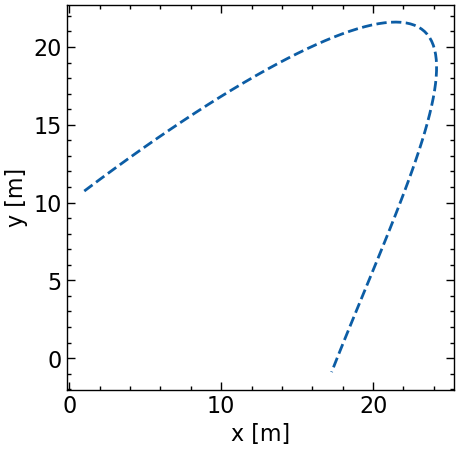

In [157]:
x = vec_Y[:,0]
y = vec_Y[:,2]
plt.figure(figsize =(5,5))
plt.plot(x, y, '--')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

The trajectory is affected as expected...

## Elastic pendulum with damping
Now, it is time to solve something much more difficult. Let's consider an elastic pendulum with damping

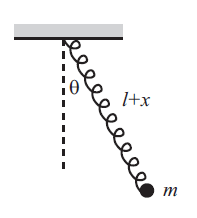

Considering movement in 2d, we can get the following equations

$$ T = \frac{1}{2}mv^2 = \frac{1}{2}m\left(\dot{x}^2+(l+x)^2\dot{\theta}^2\right) $$

$$ U = -mg(l+x)\cos{\theta} + \frac{1}{2}kx^2 $$

$$ F_{ext} = -c\vec{v}$$

The Lagrangian:

$$\mathcal{L} = \frac{1}{2}m\left(\dot{x}^2+(l+x)^2\dot{\theta}^2\right) + mg(l+x)\cos{\theta} - \frac{1}{2}kx^2$$

The lagrangian equations of motion:

$$ m\ddot{x} = -c\dot{x} + \left(m(l+x)\dot{\theta}^2 + mg\cos{\theta} - kx\right)$$

$$ m(l+x)^2\ddot{\theta}   = -2m(l+x)\dot{x}\dot{\theta}-mg(l+x)\sin{\theta} - c(l+x)^2\dot{\theta}  $$

Resulting in

$$ \begin{align}
    \frac{d}{dt} \begin{pmatrix}
           x \\
           \dot{x} \\
           \theta \\
           \dot{\theta} \\
         \end{pmatrix} = \begin{pmatrix}
           \dot{x} \\
           (l+x)\dot{\theta}^2+g\cos{\theta}-(k/m) x - (c/m)\dot{x} \\
           \dot{\theta} \\
           \frac{-g\sin{\theta}}{l+x}-\frac{2\dot{x}\dot{\theta}}{l+x} -(c/m)\dot{\theta} \\
         \end{pmatrix}
  \end{align}$$
  
Let's consider
 

Con $x(0)=0$,  $\dot{x}(0)=0$,  $\theta(0)=\frac{\pi}{2}$ y $\dot{\theta}(0)=0$

## Solving the problem:

In [163]:
# Define the constants of the problem


ct_l = 0.1 # m
ct_k = 5 # N/m
ct_g = 9.8 # m/s^2
ct_c = 0.1 # kg/s
ct_m = 0.1 # kg



# ODE of motion

def vec_F(t,Y): #The same vector of the cell above
    F = [0,0,0,0] # F is a 4d vector
    F[0] = Y[1]
    F[1] = (ct_l+Y[0])*Y[3]**2 + ct_g*np.cos(Y[2])-ct_k/ct_m*Y[0]-ct_c/ct_m*Y[1]
    F[2] = Y[3]
    F[3] = -ct_g*np.sin(Y[2])/(ct_l+Y[0])-2*Y[1]*Y[3]/(ct_l+Y[0]) - ct_c/ct_m*Y[3]
    return F

#Initial conditions

x_0 = 0 # m
d_x_0 = 0 # m/s
theta_0 = np.pi/2 # rad
d_theta_0 = 0 # rad/s

vec_Y_0 = [x_0,d_x_0,theta_0,d_theta_0]
t_0 = 0


#Build the solver

Sol = ode(vec_F).set_integrator('dopri5') # This is the solver, it uses a RK method. 
Sol.set_initial_value(vec_Y_0,t_0) # Initial conditions


t_final=5  # s, T he maximum amount of time I'm willing to integrate
dt_0=1E-4 # s, The time step

t = []
vec_Y = []



while Sol.successful() and Sol.t<t_final: # When the solutions is stopped
    Sol.integrate(Sol.t+dt_0)
    t.append(Sol.t)
    vec_Y.append(Sol.y)
    
vec_Y = np.array(vec_Y)

## Trajectory

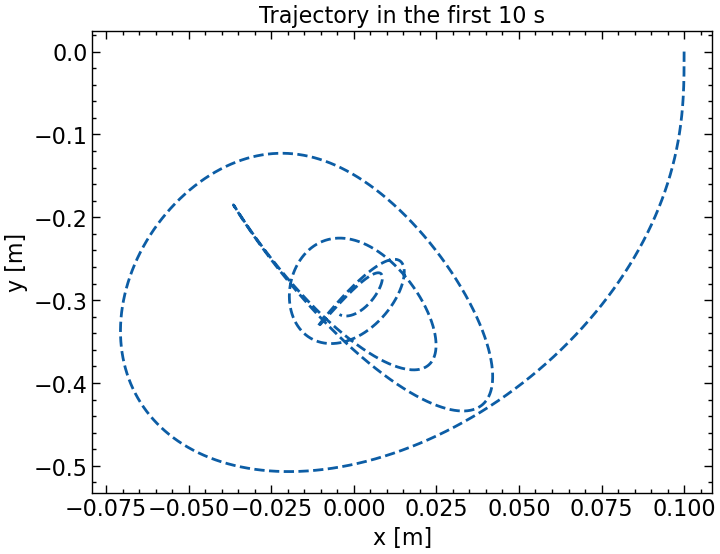

In [164]:
x = (ct_l+vec_Y[:,0])*np.sin(vec_Y[:,2])
y = -(ct_l+vec_Y[:,0])*np.cos(vec_Y[:,2])
x_dot=(ct_l+vec_Y[:,0])*np.cos(vec_Y[:,2])*vec_Y[:,3]+vec_Y[:,1]*np.sin(vec_Y[:,2])
y_dot=(ct_l+vec_Y[:,0])*np.sin(vec_Y[:,2])*vec_Y[:,3]+vec_Y[:,1]*np.cos(vec_Y[:,2])


plt.plot(x, y, '--')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Trajectory in the first 10 s')
plt.show()

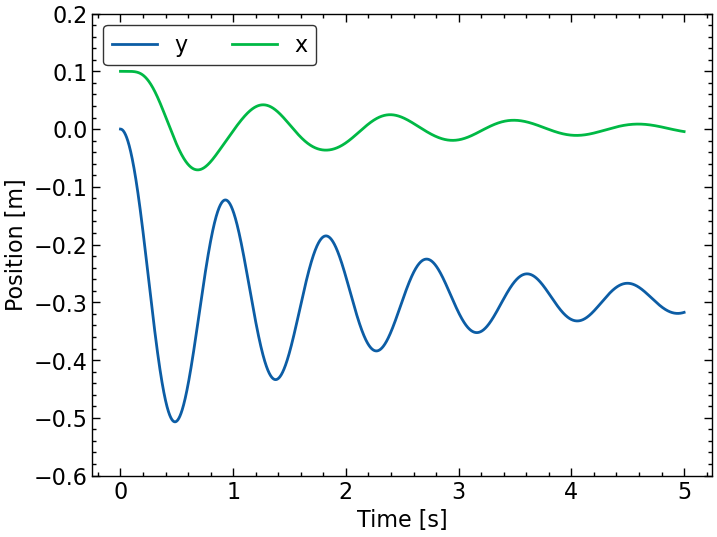

In [165]:
plt.plot(t, y, label = 'y')
plt.plot(t, x, label = 'x')
plt.legend(loc = 'upper left', frameon = True, edgecolor = 'black', ncol = 2)
plt.ylim(-0.6,0.2)
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.show()

## Phase space

Text(0.5, -0.015, 'Q [m]')

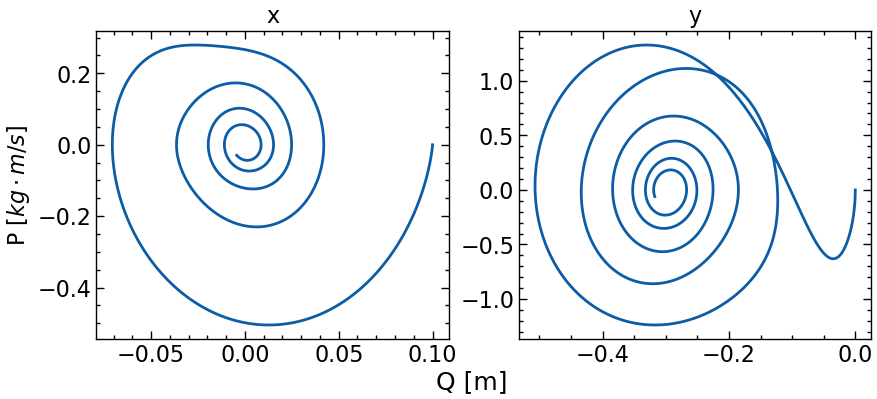

In [166]:
fig, axes = plt.subplots(1,2, figsize = (10, 4))

ax = axes[0]

ax.plot(x, x_dot)
ax.set_ylabel(r'P [$kg\cdot m/s$]')
ax.set_title(r'x')
ax = axes[0]

ax = axes[1]
ax.set_title(r'y')
ax.plot(y, y_dot)

fig.text(0.5,-0.015, r'Q [m]', fontsize = 18, ha = 'center')

There are atractors in the equilibrium positions as expected
## Error in the range of the projectile

A measuremnt doesn't mean anything without an estimate of the error...

For the case of the ideal projectile (without wind), we know, using some physics that the range of a perfect projectile is given by $ r = \frac{v^2\sin(2\theta)}{g}$, so the numerical results can be compared with the analytical expressions, this can provide an estimate of the error.

Here we are going to see how the errors change as a function of the elevation angle of the projectile and the speed

In [184]:
# ODE of motion

def vec_F(t,Y): #The same vector of the cell above
    F = [0,0,0,0] # F is a 4d vector
    F[0] = Y[1]
    F[1] = 0
    F[2] = Y[3]
    F[3] = -9.8 #m/s 
    return F


# Solver

def projectile_solver(vel, ang, vec_F):
    '''calculates numerically the maximum range of a projectile for the ideal case
    Parameters: vel: velocity, ang: angle, vec_F: the function of the ODE to be solved'''

    rad = ang*np.pi/180
    vx0 = vel*np.cos(rad)
    vy0 = vel*np.sin(rad)

    vec_Y_0 = [0,vx0,0,vy0]
    t_0 = 0

    t = []
    y = []

    Sol = ode(vec_F).set_integrator('dopri5')
    Sol.set_initial_value(vec_Y_0,t_0)
    t_final=10000
    dt_0=5E-3

    while Sol.successful() and Sol.t<t_final and Sol.y[2] >= 0:
        Sol.integrate(Sol.t+dt_0)
        t.append(Sol.t)
        y.append(Sol.y)

    y = np.array(y)
    t = np.array(t)
    max_range = y[-1,0]
    
    return max_range

def analytical_range(vel,ang):
    '''Returns the maximum range of a projectile for the ideal case
    Parameters: vel: velocity, ang: angle'''

    g = 9.8
    rad = ang*np.pi/180
    max_range = (vel**2*np.sin(2*rad)/g)
    return max_range

velocities = np.random.uniform(0,10,10000)
angles = np.random.uniform(0,90, 10000)

numerical_ranges = np.array([projectile_solver(v, a, vec_F) for v,a in zip(velocities, angles)])
analytical_ranges = np.array([analytical_range(v, a) for v,a in zip(velocities, angles)])

errors = np.abs(numerical_ranges - analytical_ranges)



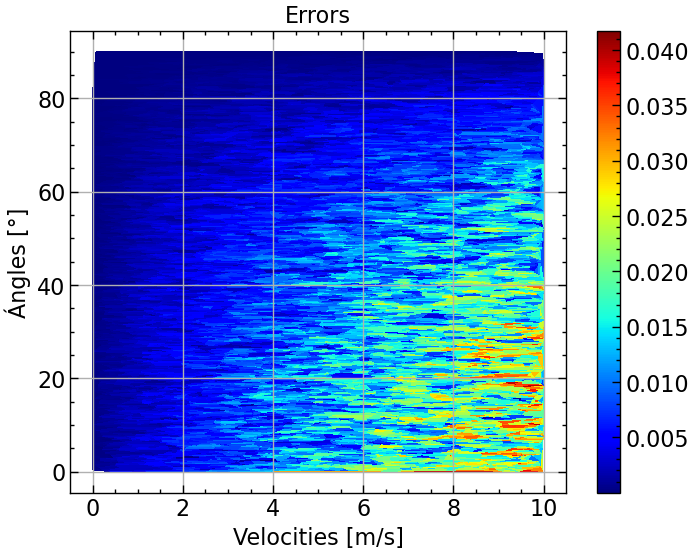

In [185]:
plt.figure()
plt.tripcolor(velocities,angles,errors,cmap='jet')
plt.title("Errors")
plt.xlabel("Velocities [m/s]")
plt.ylabel("Ángles [°]")
plt.grid()
plt.colorbar()



There we can see that the errors are small compared to the ranges and increase for lower angles...